#**Topic 5 Part I – Tree-based methods**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eJAS4xxRBkPSpduajni2Flf2f1XvRpGX)

# Setup

This project requires Python 3.7 or above:

In [2]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/decision_trees` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook:

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing a Decision Tree

In [6]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target

In [7]:
X_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


 Let's use only the information on the petals to run a Decission Tree for classification

In [8]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values


from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1812)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=1812)

The tree is already trained. 

It is possible to visualize the tree by using the `export_graphviz()` function

In [9]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

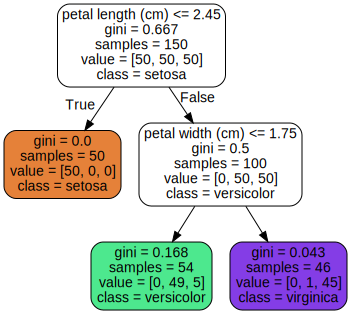

In [10]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")

# gini tells about impurity, i.e how much the classes are mixed up

Graphviz also provides the `dot` command line tool to convert `.dot` files to a variety of formats. The following command converts the dot file to a png image:

In [12]:
# extra code
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

# Making Predictions

In the chunk below, the prediction is done in the line:


```
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
```
the rest is just to build the plot and make it nice


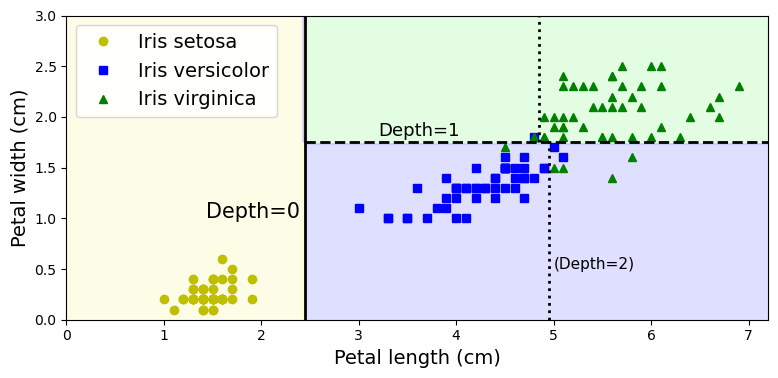

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape) # <- THIS IS THE PREDICTION!!!
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves the figure
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

# Accessing the tree structure

A trained `DecisionTreeClassifier` has a `tree_` attribute that stores the tree's structure:

In [14]:
tree = tree_clf.tree_
tree

You can get the total number of nodes in the tree:

In [15]:
tree.node_count

5

And other self-explanatory attributes are available:

In [16]:
tree.max_depth

2

In [17]:
tree.max_n_classes

3

In [18]:
tree.n_features

2

In [19]:
tree.n_leaves

3

All the information about the nodes is stored in NumPy arrays. For example, the impurity of each node:

In [20]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

And the number of instances per class that reached each node is available too:

In [23]:
tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [24]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

# Estimating Class Probabilities

Let's estimate the class of a flower whose petals are 5cm long and 1.5cm wide:

In [27]:
tree_clf.predict([[5, 1.5]])

# The result means that is predicting the class '1'. This is the SECOND class (remember indices start at 0)

array([1])

The exact probabilities of each class are:

In [25]:
tree_clf.predict_proba([[5, 1.5]]).round(3)


array([[0.   , 0.907, 0.093]])

# Regression

Let's prepare a random simple quadratic training set on which estimating a regression tree:

In [28]:
from sklearn.tree import DecisionTreeRegressor

# This is just creating made up data
np.random.seed(1812)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

# Model estimation
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=1812)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=1812)

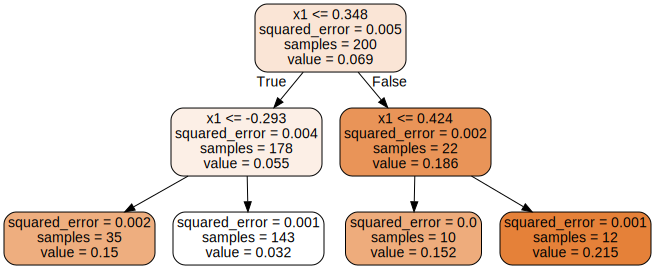

In [29]:
# We've already seen how to use export_graphviz()
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")